In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("sentimentdataset_1.csv")

In [3]:
print(df.head())

   Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes     

In [4]:
print(df.isnull().sum())

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [5]:
df.fillna(0, inplace=True)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

In [ ]:
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

In [ ]:
df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], inplace=True)

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

            Timestamp            User     Platform  \
0 2023-01-15 12:30:00   User123          Twitter     
1 2023-01-15 08:45:00   CommuterX        Twitter     
2 2023-01-15 15:45:00   FitnessFan      Instagram    
3 2023-01-15 18:20:00   AdventureX       Facebook    
4 2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  Likes       Country  \
0   #Nature #Park                                  15.0   30.0     USA         
1   #Traffic #Morning                               5.0   10.0     Canada      
2   #Fitness #Workou

In [10]:
print(df[["Likes", "Retweets"]].describe())

            Likes    Retweets
count  732.000000  732.000000
mean    42.901639   21.508197
std     14.089848    7.061286
min     10.000000    5.000000
25%     34.750000   17.750000
50%     43.000000   22.000000
75%     50.000000   25.000000
max     80.000000   40.000000


In [11]:
total_likes = df["Likes"].sum()
total_retweets = df["Retweets"].sum()
print(f"Total Likes: {total_likes}")
print(f"Total Retweets: {total_retweets}")

Total Likes: 31404.0
Total Retweets: 15744.0


In [12]:
avg_likes = df["Likes"].mean()
avg_retweets = df["Retweets"].mean()
print(f"Average Likes per Post: {avg_likes}")
print(f"Average Retweets per Post: {avg_retweets}")

Average Likes per Post: 42.90163934426229
Average Retweets per Post: 21.508196721311474


In [13]:
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day

In [14]:
engagement_by_year = df.groupby("Year")[["Likes", "Retweets"]].sum()
print(engagement_by_year)

        Likes  Retweets
Year                   
2010    160.0      80.0
2011    185.0      91.0
2012    160.0      80.0
2013    175.0      88.0
2014    160.0      80.0
2015    859.0     434.0
2016   1661.0     836.0
2017   1785.0     892.0
2018   2505.0    1253.0
2019   3224.0    1611.0
2020   2917.0    1458.0
2021   2648.0    1326.0
2022   2737.0    1367.0
2023  12228.0    6148.0


In [15]:
engagement_by_month = df.groupby("Month")[["Likes", "Retweets"]].sum()
print(engagement_by_month)

        Likes  Retweets
Month                  
1      3157.0    1577.0
2      3505.0    1753.0
3      1875.0     937.0
4      2175.0    1087.0
5      1924.0     963.0
6      3358.0    1683.0
7      3046.0    1523.0
8      3411.0    1718.0
9      3182.0    1606.0
10     1995.0    1006.0
11     2143.0    1076.0
12     1633.0     815.0


In [16]:
top_users_likes = df.groupby("User")["Likes"].sum().sort_values(ascending=False).head(10)
print("Top Users by Likes:")
print(top_users_likes)

Top Users by Likes:
User
WinterWarmth         170.0
CosmosExplorer       160.0
CarnivalDreamer      144.0
CulinaryExplorer     140.0
MusicHarmonist       140.0
PeakConqueror        138.0
EchoedLaughter       130.0
RainNurturer         126.0
GrowthSeeker         120.0
DanceEnthusiast      110.0
Name: Likes, dtype: float64


In [17]:
top_users_retweets = df.groupby("User")["Retweets"].sum().sort_values(ascending=False).head(10)
print("Top Users by Retweets:")
print(top_users_retweets)

Top Users by Retweets:
User
WinterWarmth         85.0
CosmosExplorer       80.0
CarnivalDreamer      72.0
CulinaryExplorer     70.0
MusicHarmonist       70.0
PeakConqueror        69.0
EchoedLaughter       65.0
RainNurturer         63.0
GrowthSeeker         60.0
DanceEnthusiast      56.0
Name: Retweets, dtype: float64


In [18]:
top_posts_likes = df.sort_values(by="Likes", ascending=False).head(10)
print("Top Posts by Likes:")
print(top_posts_likes[["Text", "Likes", "Retweets", "User"]])

Top Posts by Likes:
                                                  Text  Likes  Retweets  \
481  Surrounded by the colors of joy, a canvas pain...   80.0      40.0   
530  Captivated by the spellbinding plot twists, th...   80.0      40.0   
382  A sense of wonder at the vastness of the cosmo...   80.0      40.0   
560  In the serene beauty of a sunset, nature unfol...   80.0      40.0   
470  Dancing on sunshine, each step a celebration o...   80.0      40.0   
550  After a series of defeats, the soccer team fac...   80.0      40.0   
368  Elation over discovering a rare book in a quai...   80.0      40.0   
540  Celebrating a historic victory in the World Cu...   80.0      40.0   
355  Anticipation for an upcoming adventure in an e...   80.0      40.0   
570  Underneath the city lights, the dancer express...   80.0      40.0   

                                      User  
481                      ColorfulLaughter   
530       MovieEnthusiastPremiereAttendee   
382                

In [19]:
top_posts_retweets = df.sort_values(by="Retweets", ascending=False).head(10)
print("Top Posts by Retweets:")
print(top_posts_retweets[["Text", "Retweets", "Likes", "User"]])

Top Posts by Retweets:
                                                  Text  Retweets  Likes  \
570  Underneath the city lights, the dancer express...      40.0   80.0   
470  Dancing on sunshine, each step a celebration o...      40.0   80.0   
368  Elation over discovering a rare book in a quai...      40.0   80.0   
540  Celebrating a historic victory in the World Cu...      40.0   80.0   
560  In the serene beauty of a sunset, nature unfol...      40.0   80.0   
355  Anticipation for an upcoming adventure in an e...      40.0   80.0   
402  Awe-inspired by the vastness of the cosmos on ...      40.0   80.0   
530  Captivated by the spellbinding plot twists, th...      40.0   80.0   
382  A sense of wonder at the vastness of the cosmo...      40.0   80.0   
432  Heartache deepens, a solitary journey through ...      40.0   80.0   

                                      User  
570   DanceEnthusiastCityNightPerformance   
470                        SunshineDancer   
368             

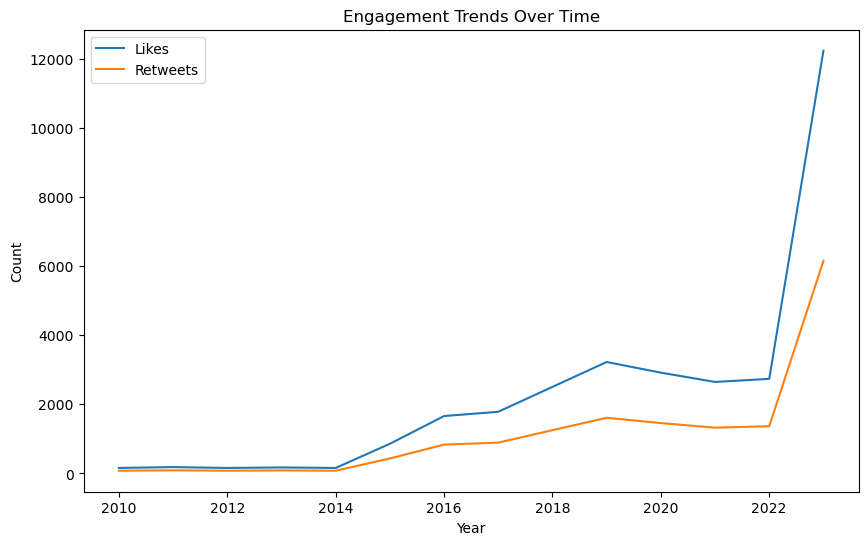

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=engagement_by_year.index, y=engagement_by_year["Likes"], label="Likes")
sns.lineplot(x=engagement_by_year.index, y=engagement_by_year["Retweets"], label="Retweets")
plt.title("Engagement Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_36468\1180994787.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users_likes.values, y=top_users_likes.index, palette="viridis")


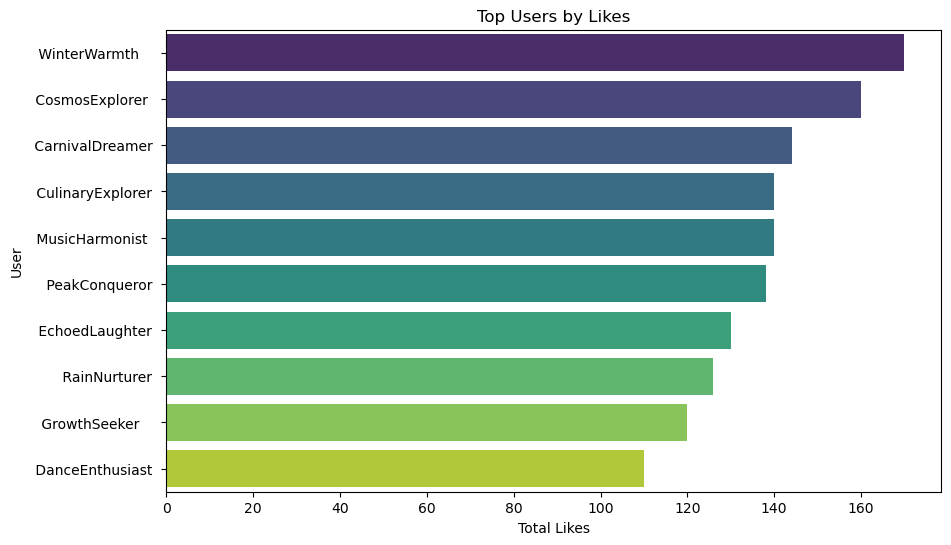

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_users_likes.values, y=top_users_likes.index, palette="viridis")
plt.title("Top Users by Likes")
plt.xlabel("Total Likes")
plt.ylabel("User")
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_36468\2660929830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_users_retweets.values, y=top_users_retweets.index, palette="viridis")


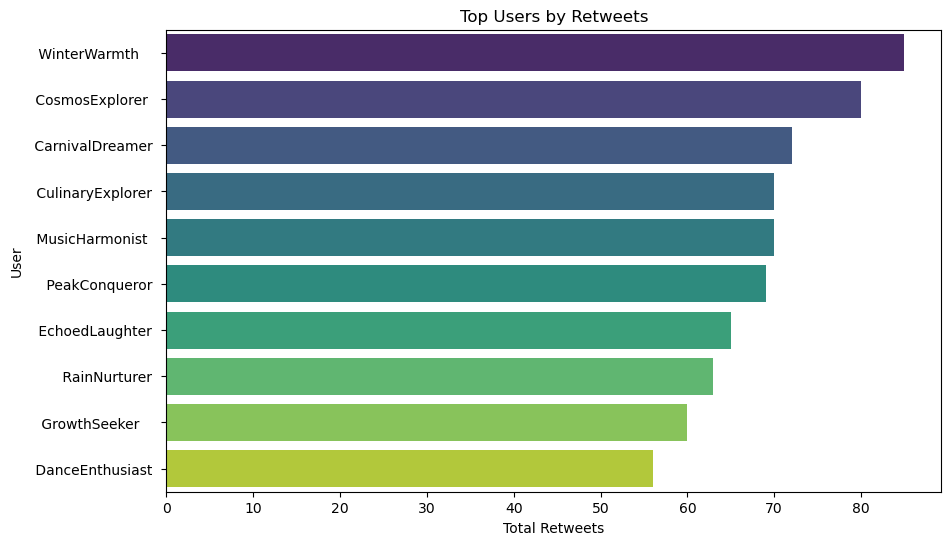

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_users_retweets.values, y=top_users_retweets.index, palette="viridis")
plt.title("Top Users by Retweets")
plt.xlabel("Total Retweets")
plt.ylabel("User")
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_36468\3199982389.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_posts_likes["Likes"], y=top_posts_likes["Text"], palette="viridis")


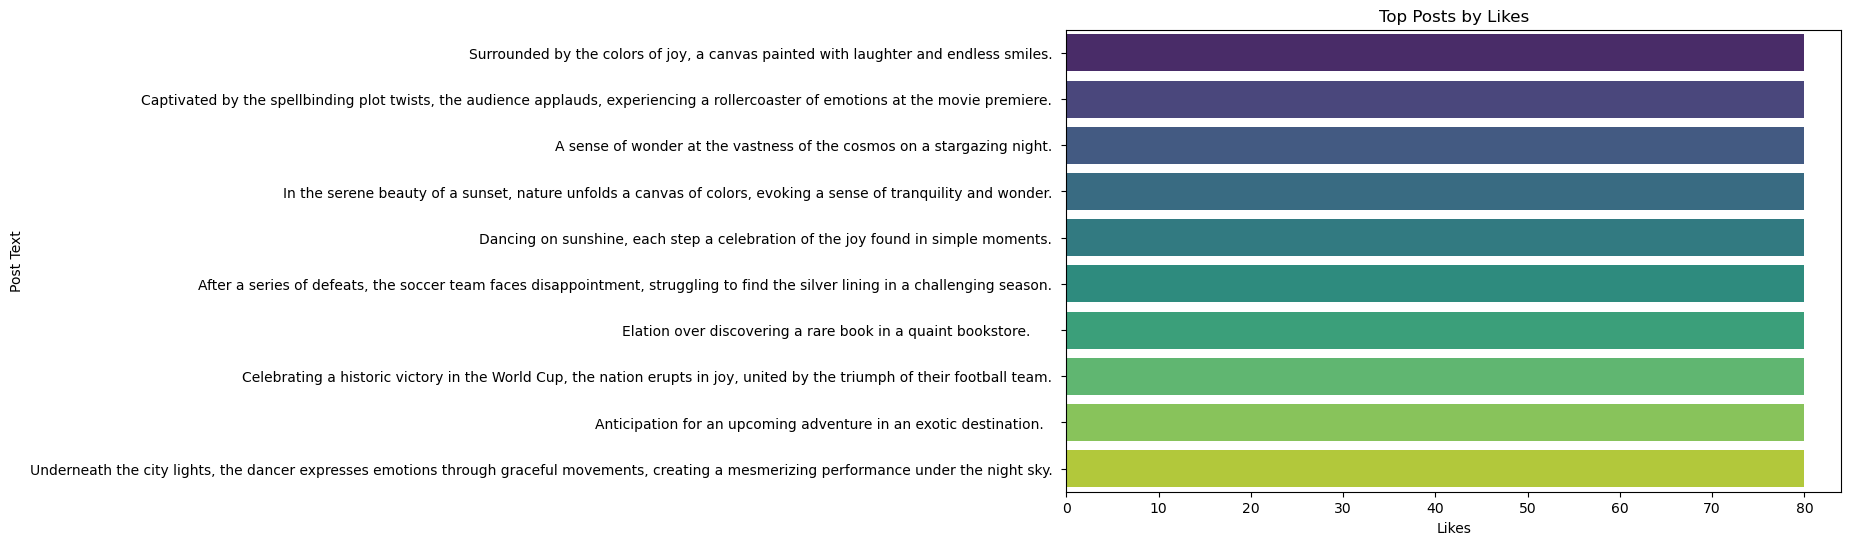

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_posts_likes["Likes"], y=top_posts_likes["Text"], palette="viridis")
plt.title("Top Posts by Likes")
plt.xlabel("Likes")
plt.ylabel("Post Text")
plt.show()

C:\Users\shiva\AppData\Local\Temp\ipykernel_36468\1608406166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_posts_retweets["Retweets"], y=top_posts_retweets["Text"], palette="viridis")


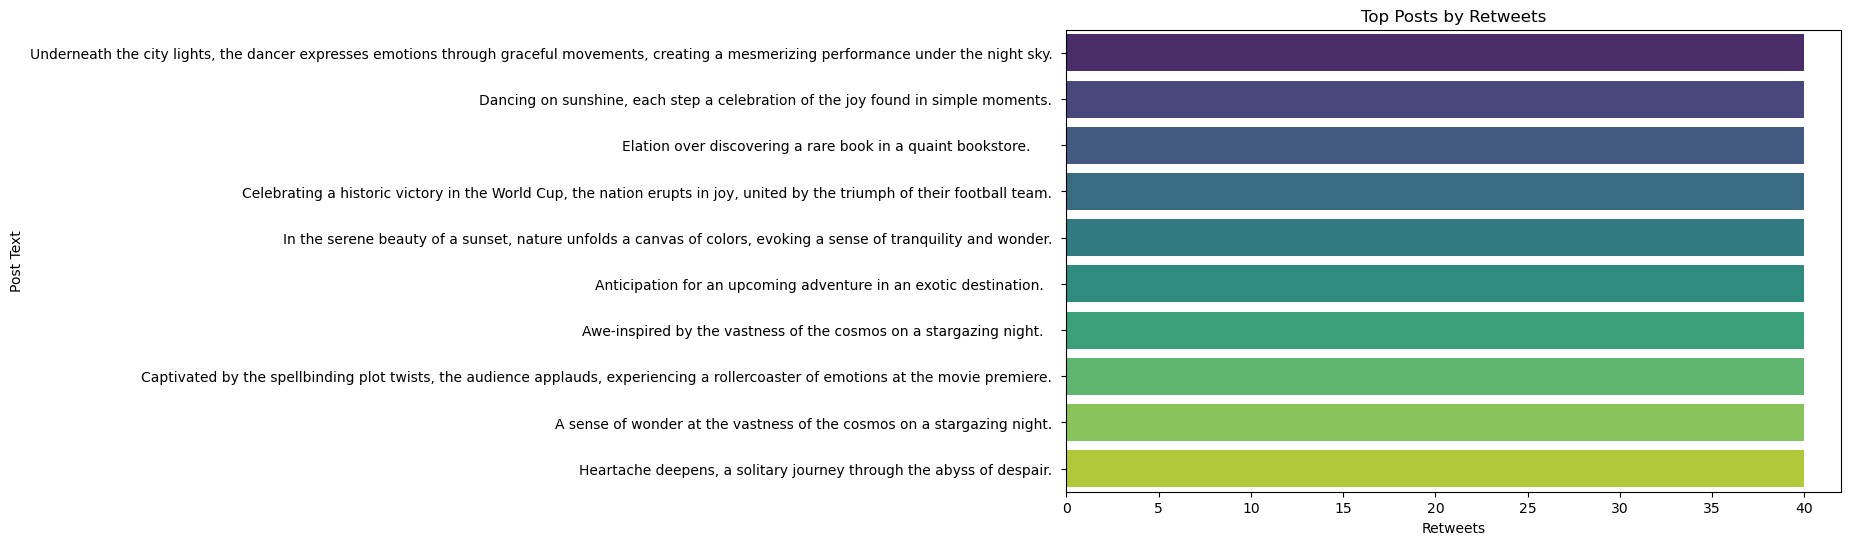

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_posts_retweets["Retweets"], y=top_posts_retweets["Text"], palette="viridis")
plt.title("Top Posts by Retweets")
plt.xlabel("Retweets")
plt.ylabel("Post Text")
plt.show()